## 예제
1. csv 폴더에서 4개의 파일을 로드 (tran1, tran2, tran_d_1, tran_d_2)
2. tran_1 과 tran_2 는 단순한 행 추가 결합 (유니언 결합)
3. tran_d_1 과 tran_d_2 도 유니언 결합
4. 2번, 3번 과정에서 나온 데이터 프레임을 특정 조건에 맞춰서 2번 데이터 프레임 기준으로 열 추가 결합 (조인결합)
5. csv 폴더에 있는 2개의 파일 로드 (custom_master, item_master)
6. 4번 과정에서 나온 데이터프레임과 custom_master 조인 결합
7. 6번 과정에서 나온 데이터프레임과 item_master 조인 결합
8. 결합이된 데이터프레임에서 quantity 컬럼과 item_price 컬럼의 데이터를 가지고 total_price 라는 파생변수를 생성(total_price = item_price * quantity)

In [1]:
import pandas as pd
import os

In [5]:
# csv 폴더에서 4개의 파일을 로드 (tran1, tran2, tran_d_1, tran_d_2)
tran1 = pd.read_csv("../csv/tran_1.csv")
tran2 = pd.read_csv("../csv/tran_2.csv")
tran_d_1 = pd.read_csv("../csv/tran_d_1.csv")
tran_d_2 = pd.read_csv("../csv/tran_d_2.csv")

In [27]:
# tran_1 과 tran_2 는 단순한 행 추가 결합 (유니언 결합)
df = pd.concat([tran1, tran2], axis = 0, ignore_index = True)
df.head(1)

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502


In [28]:
# tran_d_1 과 tran_d_2 도 유니언 결합
df2 = pd.concat([tran_d_1, tran_d_2], axis = 0, ignore_index = True)
df2.head(1)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1


In [30]:
# 2번, 3번 과정에서 나온 데이터 프레임을 특정 조건에 맞춰서 2번 데이터 프레임 기준으로 열 추가 결합 (조인결합)
df3 = pd.merge(df, df2, on = "transaction_id", how = "left")
df3.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1


In [37]:
# csv 폴더에 있는 2개의 파일 로드 (customer_master, item_master)
customer_master = pd.read_csv("../csv/customer_master.csv")
customer_master.head(1)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0


In [38]:
# csv 폴더에 있는 2개의 파일 로드 (customer_master, item_master)
item_master = pd.read_csv("../csv/item_master.csv")
item_master.head(1)

,item_id,item_name,item_price
0,S001,PC-A,50000


In [42]:
# 4번 과정에서 나온 데이터프레임과 custom_master 조인결합
df4 = pd.merge(df3, customer_master, on = "customer_id", how = "inner")
df4.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0


In [43]:
# 6번 과정에서 나온 데이터프레임과 item_master 조인 결합
df4 = pd.merge(df4, item_master, on = "item_id", how = "inner")
df4.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000


In [45]:
# 결합이된 데이터프레임에서 quantity 컬럼과 item_price 컬럼의 데이터를 가지고
# total_price 라는 파생변수를 생성(total_price = item_price * quantity)
df4["total_price"] = df4["item_price"] * df4["quantity"]
df4.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,210000
1,T0000003439,420000,2019-04-30 02:39:00,HD298120,3494,S005,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0,PC-E,210000,210000
2,T0000003439,420000,2019-04-30 02:39:00,HD298120,3495,S005,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0,PC-E,210000,210000
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0,PC-E,210000,210000
4,T0000000832,210000,2019-02-19 19:48:24,IK452215,753,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0,PC-E,210000,210000


In [49]:
# 거래의 금액이 가장 높은 아이템은 무엇인가?
group_data = df4[["item_name", "total_price"]].groupby("item_name").sum()

In [50]:
group_data.sort_values("total_price", ascending = False).index[0]

'PC-E'

In [54]:
df4["gender"]

0       M
1       F
2       F
3       M
4       M
       ..
6064    M
6065    M
6066    M
6067    M
6068    M
Name: gender, Length: 6069, dtype: object

In [55]:
origin_data = df4.copy()

In [57]:
# loc를 이용하여 m, f 를 변경
# m -> 남자, f -> 여자
df4.loc[df4["gender"] == "M", "gender"] = "남자"
df4.loc[df4["gender"] == "F", "gender"] = "여자"

In [58]:
df4["gender"].value_counts()

남자    3268
여자    2801
Name: gender, dtype: int64

In [59]:
df4 = origin_data.copy()

In [60]:
df4["gender"].value_counts()

M    3268
F    2801
Name: gender, dtype: int64

In [61]:
# apply() 사용하여 남자, 여자 변경
def change(x) :
    # x 에는 M 아니면 F
    if x == "F" :
        result = "여자"
    else :
        result = "남자"
    return result

df4["gender"].apply(change)


0       남자
1       여자
2       여자
3       남자
4       남자
        ..
6064    남자
6065    남자
6066    남자
6067    남자
6068    남자
Name: gender, Length: 6069, dtype: object

In [63]:
df4["gender"].apply(lambda x : "남자" if (x == "M") else ("여자" if(x == "F") else "무응답"))

0       남자
1       여자
2       여자
3       남자
4       남자
        ..
6064    남자
6065    남자
6066    남자
6067    남자
6068    남자
Name: gender, Length: 6069, dtype: object

In [64]:
# paument_date 컬럼을 시계열 데이터 변경
# to_datetime()
df4.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,210000


In [66]:
df4["payment_date"] = pd.to_datetime(df4["payment_date"], format = "%Y-%m-%d %H:%M:%S")

In [68]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6069 entries, 0 to 6068
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  6069 non-null   object        
 1   price           6069 non-null   int64         
 2   payment_date    6069 non-null   datetime64[ns]
 3   customer_id     6069 non-null   object        
 4   detail_id       6069 non-null   int64         
 5   item_id         6069 non-null   object        
 6   quantity        6069 non-null   int64         
 7   name            6069 non-null   object        
 8   class           6069 non-null   object        
 9   gender          6069 non-null   object        
 10  start_date      6069 non-null   object        
 11  end_date        1978 non-null   object        
 12  campaign_id     6069 non-null   object        
 13  is_deleted      6069 non-null   int64         
 14  item_name       6069 non-null   object        
 15  item

In [72]:
# 시계열 데이터에서 월-년 추출해서 새로운 파생변수 payment_month 생성
df4["payment_month"] = df4["payment_date"].dt.strftime("%m-%Y")

In [73]:
df4.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,210000,02-2019


In [88]:
# 월별 거래량을 확인
group_data = df4[["payment_month", "total_price"]].groupby("payment_month").agg(["mean", "sum"])
group_data

total_price           
                        mean        sum
payment_month                          
02-2019        137592.964824  136905000
03-2019        135154.382470  135695000
04-2019        136106.106106  135970000
05-2019        133551.307847  132750000
06-2019        135747.800587  138870000
07-2019        138377.609108  145850000

In [78]:
!pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 37.5 MB/s eta 0:00:00
     ---------------------------------------- 163.0/163.0 kB ? eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 66.6 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 40.3 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB ? eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: xlabel='payment_month'>

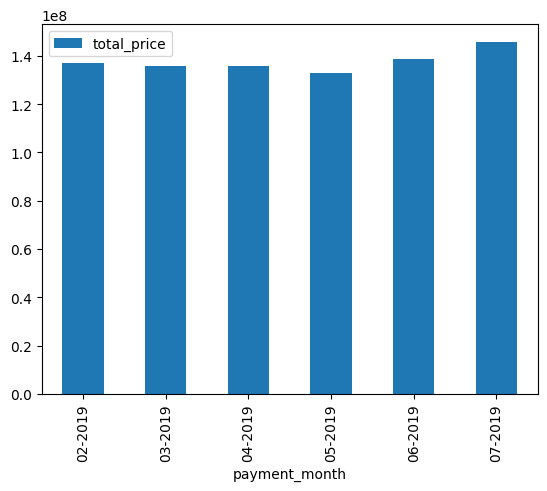

In [80]:
group_data.plot.bar()

In [85]:
pivot_data = pd.pivot_table(
    df4, index = "payment_month", aggfunc = ["sum", "mean", "min", "max", "std"], values = "total_price"
)

<Axes: xlabel='payment_month'>

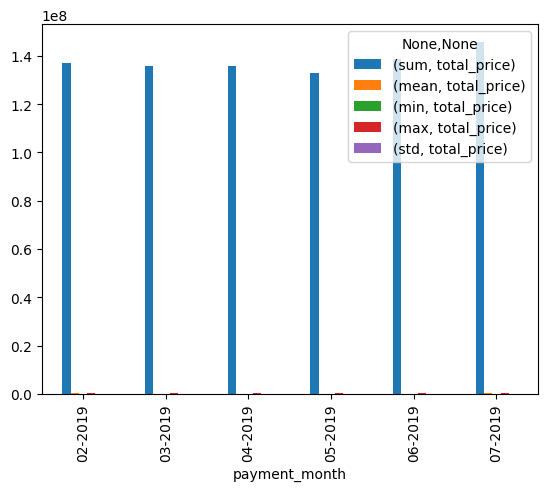

In [86]:
pivot_data.plot.bar()